## Importing all libraries needed

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# Data Visualization Packages
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

# Load Text Cleaning Package
import neattext.functions as nfx

#for Sentiment Analysis
from textblob import TextBlob

In [2]:
df = pd.read_csv('monkeypox_1.csv')
print(df)

       Unnamed: 0                       Date         Username  \
0               0  2022-08-17 23:57:12+00:00     darkcobrabws   
1               1  2022-08-17 23:46:13+00:00          CMANN66   
2               2  2022-08-17 23:31:58+00:00          1215Deb   
3               3  2022-08-17 23:27:07+00:00    marlborhoe666   
4               4  2022-08-17 23:27:01+00:00  RatherBeGulfing   
...           ...                        ...              ...   
33764       33764  2022-04-01 12:59:45+00:00  FrunksChristine   
33765       33765  2022-04-01 12:33:52+00:00    monkey_leader   
33766       33766  2022-04-01 12:27:07+00:00          PooBouy   
33767       33767  2022-04-01 05:14:17+00:00  JHolden77262914   
33768       33768  2022-04-01 04:32:31+00:00   AlanSubie4Life   

                          Location  Verified Hashtag  \
0                              NaN     False     NaN   
1                         Winnipeg     False     NaN   
2                    Virginia, USA     False     Na

In [3]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Preview
df.head()

,Unnamed: 0,Date,Username,Location,Verified,Hashtag,Tweet
0,0,2022-08-17 23:57:12+00:00,darkcobrabws,NaN,False,NaN,@eastcoastHuman @GovCanHealth You guys are obs...
1,1,2022-08-17 23:46:13+00:00,CMANN66,Winnipeg,False,NaN,@MBGov We need 100% compliance on the Monkey P...
2,2,2022-08-17 23:31:58+00:00,1215Deb,"Virginia, USA",False,NaN,"@ajwhitewolf So a friend, who is gay, and is h..."
3,3,2022-08-17 23:27:07+00:00,marlborhoe666,NWI,False,NaN,Anyone else have insane anxiety about monkey p...
4,4,2022-08-17 23:27:01+00:00,RatherBeGulfing,Bunnyville Station,False,NaN,"Where I live now, the monkey pox vaccine is on..."


#### Task
+ Text
    - Text Preprocessing
    - Sentiment Analysis
    - Keyword Extraction
    - Entity Extraction 

In [5]:
# Check Columns
df.columns

Index(['Unnamed: 0', 'Date', 'Username', 'Location', 'Verified', 'Hashtag',
       'Tweet'],
      dtype='object')

In [6]:
# Datatype
df.dtypes

Unnamed: 0     int64
Date          object
Username      object
Location      object
Verified        bool
Hashtag       object
Tweet         object
dtype: object

#### Text Analysis of tweet

In [7]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
df['Tweet'].iloc[2]

'@ajwhitewolf So a friend, who is gay, and is hiv positive is getting a monkey pox vaccine next week.'

### Noise
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ emojis
+ special char

In [9]:
df.head()

,Unnamed: 0,Date,Username,Location,Verified,Hashtag,Tweet
0,0,2022-08-17 23:57:12+00:00,darkcobrabws,NaN,False,NaN,@eastcoastHuman @GovCanHealth You guys are obs...
1,1,2022-08-17 23:46:13+00:00,CMANN66,Winnipeg,False,NaN,@MBGov We need 100% compliance on the Monkey P...
2,2,2022-08-17 23:31:58+00:00,1215Deb,"Virginia, USA",False,NaN,"@ajwhitewolf So a friend, who is gay, and is h..."
3,3,2022-08-17 23:27:07+00:00,marlborhoe666,NWI,False,NaN,Anyone else have insane anxiety about monkey p...
4,4,2022-08-17 23:27:01+00:00,RatherBeGulfing,Bunnyville Station,False,NaN,"Where I live now, the monkey pox vaccine is on..."


#### Removing Hashtags

In [10]:
df['Tweet'].apply(nfx.extract_hashtags)

0        []
1        []
2        []
3        []
4        []
         ..
33764    []
33765    []
33766    []
33767    []
33768    []
Name: Tweet, Length: 33769, dtype: object

In [11]:
df['extracted_hashtags'] = df['Tweet'].apply(nfx.extract_hashtags)

In [12]:
df[['extracted_hashtags','Hashtag']]

,extracted_hashtags,Hashtag
0,[],NaN
1,[],NaN
2,[],NaN
3,[],NaN
4,[],NaN
...,...,...
33764,[],NaN
33765,[],NaN
33766,[],NaN
33767,[],NaN


In [13]:
# Cleaning Text
df['clean_tweet'] = df['Tweet'].apply(nfx.remove_hashtags)

In [14]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
0,@eastcoastHuman @GovCanHealth You guys are obs...,@eastcoastHuman @GovCanHealth You guys are obs...
1,@MBGov We need 100% compliance on the Monkey P...,@MBGov We need 100% compliance on the Monkey P...
2,"@ajwhitewolf So a friend, who is gay, and is h...","@ajwhitewolf So a friend, who is gay, and is h..."
3,Anyone else have insane anxiety about monkey p...,Anyone else have insane anxiety about monkey p...
4,"Where I live now, the monkey pox vaccine is on...","Where I live now, the monkey pox vaccine is on..."
...,...,...
33764,Reliance on Monkeys for COVID19 Vaccine Experi...,Reliance on Monkeys for COVID19 Vaccine Experi...
33765,Fauci should be prepared to have no one listen...,Fauci should be prepared to have no one listen...
33766,@_lil_woozy_ Does this mean you don’t support ...,@_lil_woozy_ Does this mean you don’t support ...
33767,@Njv251Njv25 @kymburleigh @thehill Even if we ...,@Njv251Njv25 @kymburleigh @thehill Even if we ...


#### Removing Mentions

In [15]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [16]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
0,@eastcoastHuman @GovCanHealth You guys are obs...,You guys are obsessed with vaccines arent ...
1,@MBGov We need 100% compliance on the Monkey P...,We need 100% compliance on the Monkey Pox Va...
2,"@ajwhitewolf So a friend, who is gay, and is h...","So a friend, who is gay, and is hiv positive..."
3,Anyone else have insane anxiety about monkey p...,Anyone else have insane anxiety about monkey p...
4,"Where I live now, the monkey pox vaccine is on...","Where I live now, the monkey pox vaccine is on..."
...,...,...
33764,Reliance on Monkeys for COVID19 Vaccine Experi...,Reliance on Monkeys for COVID19 Vaccine Experi...
33765,Fauci should be prepared to have no one listen...,Fauci should be prepared to have no one listen...
33766,@_lil_woozy_ Does this mean you don’t support ...,Does this mean you don’t support them testin...
33767,@Njv251Njv25 @kymburleigh @thehill Even if we ...,Even if we give Trump all the credit (wh...


In [17]:
df['clean_tweet'].iloc[10]

'Got flu shot today, waiting on next Covid booster..oh joy🤷\u200d♂️ Pure speculation but I wonder if, this time next year, if not sooner, more people will be getting Monkey Pox vaccines than were originally thought necessary😡'

#### Removing Multiple White Spaces

In [18]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [19]:
df['clean_tweet'].iloc[10]

'Got flu shot today, waiting on next Covid booster..oh joy🤷\u200d♂️ Pure speculation but I wonder if, this time next year, if not sooner, more people will be getting Monkey Pox vaccines than were originally thought necessary😡'

#### Removing Links and urls


In [20]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

#### Removing Punctuations

In [21]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [22]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
0,@eastcoastHuman @GovCanHealth You guys are obs...,You guys are obsessed with vaccines arent you...
1,@MBGov We need 100% compliance on the Monkey P...,We need 100% compliance on the Monkey Pox Vac...
2,"@ajwhitewolf So a friend, who is gay, and is h...",So a friend who is gay and is hiv positive is...
3,Anyone else have insane anxiety about monkey p...,Anyone else have insane anxiety about monkey p...
4,"Where I live now, the monkey pox vaccine is on...",Where I live now the monkey pox vaccine is onl...
...,...,...
33764,Reliance on Monkeys for COVID19 Vaccine Experi...,Reliance on Monkeys for COVID19 Vaccine Experi...
33765,Fauci should be prepared to have no one listen...,Fauci should be prepared to have no one listen...
33766,@_lil_woozy_ Does this mean you don’t support ...,Does this mean you don’t support them testing...
33767,@Njv251Njv25 @kymburleigh @thehill Even if we ...,Even if we give Trump all the credit (which h...


### Sentiment Analysis
- Using TextBlob

In [23]:
from textblob import TextBlob

In [24]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [25]:
# Testing the first tweet
ex1 = df['clean_tweet'].iloc[0]

In [26]:
get_sentiment(ex1)

{'polarity': -0.275, 'subjectivity': 0.5, 'sentiment': 'Negative'}

In [27]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [28]:
df['sentiment_results']

0        {'polarity': -0.275, 'subjectivity': 0.5, 'sen...
1        {'polarity': -0.525, 'subjectivity': 0.5, 'sen...
2        {'polarity': 0.14848484848484847, 'subjectivit...
3        {'polarity': -0.14486607142857144, 'subjectivi...
4        {'polarity': 0.19772727272727272, 'subjectivit...
                               ...                        
33764    {'polarity': -0.5, 'subjectivity': 0.3, 'senti...
33765    {'polarity': 0.55, 'subjectivity': 0.75, 'sent...
33766    {'polarity': -0.3125, 'subjectivity': 0.6875, ...
33767    {'polarity': -0.05, 'subjectivity': 0.0, 'sent...
33768    {'polarity': 0.0625, 'subjectivity': 0.2583333...
Name: sentiment_results, Length: 33769, dtype: object

In [29]:
df['sentiment_results'].iloc[0]

{'polarity': -0.275, 'subjectivity': 0.5, 'sentiment': 'Negative'}

In [30]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.275,0.5,Negative


In [31]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [32]:
df.head()

,Unnamed: 0,Date,Username,Location,Verified,Hashtag,Tweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2022-08-17 23:57:12+00:00,darkcobrabws,NaN,False,NaN,@eastcoastHuman @GovCanHealth You guys are obs...,[],You guys are obsessed with vaccines arent you...,"{'polarity': -0.275, 'subjectivity': 0.5, 'sen...",-0.275000,0.500000,Negative
1,1,2022-08-17 23:46:13+00:00,CMANN66,Winnipeg,False,NaN,@MBGov We need 100% compliance on the Monkey P...,[],We need 100% compliance on the Monkey Pox Vac...,"{'polarity': -0.525, 'subjectivity': 0.5, 'sen...",-0.525000,0.500000,Negative
2,2,2022-08-17 23:31:58+00:00,1215Deb,"Virginia, USA",False,NaN,"@ajwhitewolf So a friend, who is gay, and is h...",[],So a friend who is gay and is hiv positive is...,"{'polarity': 0.14848484848484847, 'subjectivit...",0.148485,0.282197,Positive
3,3,2022-08-17 23:27:07+00:00,marlborhoe666,NWI,False,NaN,Anyone else have insane anxiety about monkey p...,[],Anyone else have insane anxiety about monkey p...,"{'polarity': -0.14486607142857144, 'subjectivi...",-0.144866,0.564286,Negative
4,4,2022-08-17 23:27:01+00:00,RatherBeGulfing,Bunnyville Station,False,NaN,"Where I live now, the monkey pox vaccine is on...",[],Where I live now the monkey pox vaccine is onl...,"{'polarity': 0.19772727272727272, 'subjectivit...",0.197727,0.505556,Positive


In [33]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [34]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution')

In [35]:
df['sentiment'].value_counts()

Negative    19481
Positive    13499
Neutral       789
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

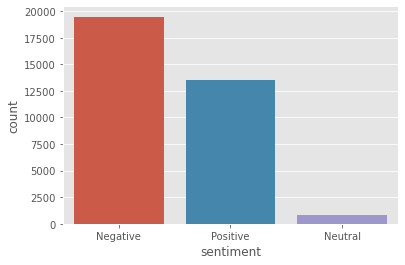

In [36]:
# Plot with seaborn
sns.countplot(df['sentiment'])

Text(0.5, 1.0, 'Distribution of sentiments')

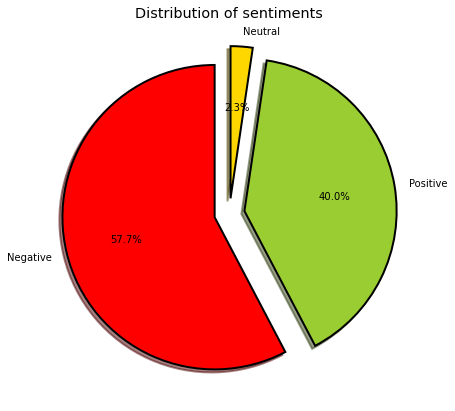

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "yellowgreen", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [38]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [39]:
positive_tweet

2         So a friend who is gay and is hiv positive is...
4        Where I live now the monkey pox vaccine is onl...
5        Wow no wait for my second monkey pox vaccine a...
7        We got our first case of monkey pox and limite...
10       Got flu shot today waiting on next Covid boost...
                               ...                        
33755    Testing these vaccines on monkeys was one of t...
33758    Barbados has monkeys I came across this cute t...
33759    If you think Im trying that many vaccines that...
33765    Fauci should be prepared to have no one listen...
33768     I don’t think we know yet (in published data ...
Name: clean_tweet, Length: 13499, dtype: object

#### Remove Stopwords and Convert to Tokens

In [40]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [41]:
positive_tweet_list 

['friend gay hiv positive getting monkey pox vaccine week',
 'live monkey pox vaccine available sexual health centres theres strict eligibility requirements hometown theyre giving community centre 😮 requirements',
 'Wow wait second monkey pox vaccine organized Thank',
 'got case monkey pox limited vaccines💉',
 'Got flu shot today waiting Covid boosteroh joy🤷\u200d♂️ Pure speculation wonder time year sooner people getting Monkey Pox vaccines originally thought necessary😡',
 'That’s fair agree that’s long way debating vaccines large danger agreed mandates restrictions hindsight maybe wrong doubt vaccines way',
 'monkey pox vaccine effective potholes assholes',
 'ABC right now: vaccine monkey pox 100% effective risk (gay men) need change behaviour (less orgies) Staggering homophobia national broadcaster',
 'Walk appt dose Monkey Pox vaccine easier God damn love living progressive city blue state',
 'Got new Monkey Pox Vaccine Card today 4th vaccine free Dunkin Donuts coffee',
 'Blue Water

In [42]:
negative_tweet_list

['guys obsessed vaccines arent fetish phobia needles dont think covid vaccine help monkey pox matter friends tell',
 'need 100% compliance Monkey Pox Vaccine you’re disgusting antivaxxers',
 'insane anxiety monkey pox can’t find single fucking place small pox vaccine protects :)))) there’s little lab testing availablelt3 love',
 'come took vaccine ones getting monkey box 🤔',
 'stat Ive percentage people monkey pox took covid vaccine',
 'monkey tell boosters got 3 shots Vaccine injuries death dont mention aint gonna booster save unvax risk vaccine injuries vaccine doesnt help',
 '$BWV 730 8 2258 monkey pox vaccines role 🚀🚀🚀🚀🩳🩳🩳\U0001f90c🏼',
 'Came slut mom telling monkey pox vaccine appt Friday',
 'Finally got monkey pox vaccine 🙈 🙉 🙊 💉',
 'want monkey pox vaccine yesterday yall stay safe🙏',
 'arm hurts monkey pox vaccine wtf',
 'Yay LA County opening second doses monkey pox vaccine time schedule',
 'Hi want thank Knowing theres vaccines thank vaccinating hope anti vaxers stick want vac

In [43]:
neutral_tweet_list

['reveals Rotavirus childhood vaccine shortage hits African countries trending',
 'dont need vaccine dont sex monkeys people boils dogs think decided enter',
 'Blue Water Vaccines Reports Second Quarter 2022 Financial Results Recent Business Highlights $BWV',
 'Explained: Transmission Symptoms Vaccines Treatment trending',
 'Monkeypox vaccine remains short supply urge stop playing monkeys Thank',
 'Lou seal transgender think getting monkeypox vaccine',
 'apparently let monkey pox vaccine head',
 'job offering MONKEYPOX vaccine BUTT said it’s “strict criteria” meet receiving MonkeyVacc',
 'asked point making somebody dies relevance vaccine status',
 'claiming died covid vaccines',
 'Whats got vaccines work covid leading cause death 2020',
 'Moderna Stock Buy UKs Omicron Vaccine Approval $MRNA',
 'whopper needs vaccine hairloss hes trying hide',
 'vaccine immunity booster',
 'video recording people line monkeys pox vaccine saying “yea gonna homos day”',
 'reading subheading tells article

### Tokenization

In [44]:
#Positive Tokens
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

#Negative Tokens
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]

#Neutral Tokens
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [45]:
pos_tokens

['friend',
 'gay',
 'hiv',
 'positive',
 'getting',
 'monkey',
 'pox',
 'vaccine',
 'week',
 'live',
 'monkey',
 'pox',
 'vaccine',
 'available',
 'sexual',
 'health',
 'centres',
 'theres',
 'strict',
 'eligibility',
 'requirements',
 'hometown',
 'theyre',
 'giving',
 'community',
 'centre',
 '😮',
 'requirements',
 'Wow',
 'wait',
 'second',
 'monkey',
 'pox',
 'vaccine',
 'organized',
 'Thank',
 'got',
 'case',
 'monkey',
 'pox',
 'limited',
 'vaccines💉',
 'Got',
 'flu',
 'shot',
 'today',
 'waiting',
 'Covid',
 'boosteroh',
 'joy🤷\u200d♂️',
 'Pure',
 'speculation',
 'wonder',
 'time',
 'year',
 'sooner',
 'people',
 'getting',
 'Monkey',
 'Pox',
 'vaccines',
 'originally',
 'thought',
 'necessary😡',
 'That’s',
 'fair',
 'agree',
 'that’s',
 'long',
 'way',
 'debating',
 'vaccines',
 'large',
 'danger',
 'agreed',
 'mandates',
 'restrictions',
 'hindsight',
 'maybe',
 'wrong',
 'doubt',
 'vaccines',
 'way',
 'monkey',
 'pox',
 'vaccine',
 'effective',
 'potholes',
 'assholes',
 'ABC

In [46]:
neg_tokens

['guys',
 'obsessed',
 'vaccines',
 'arent',
 'fetish',
 'phobia',
 'needles',
 'dont',
 'think',
 'covid',
 'vaccine',
 'help',
 'monkey',
 'pox',
 'matter',
 'friends',
 'tell',
 'need',
 '100%',
 'compliance',
 'Monkey',
 'Pox',
 'Vaccine',
 'you’re',
 'disgusting',
 'antivaxxers',
 'insane',
 'anxiety',
 'monkey',
 'pox',
 'can’t',
 'find',
 'single',
 'fucking',
 'place',
 'small',
 'pox',
 'vaccine',
 'protects',
 ':))))',
 'there’s',
 'little',
 'lab',
 'testing',
 'availablelt3',
 'love',
 'come',
 'took',
 'vaccine',
 'ones',
 'getting',
 'monkey',
 'box',
 '🤔',
 'stat',
 'Ive',
 'percentage',
 'people',
 'monkey',
 'pox',
 'took',
 'covid',
 'vaccine',
 'monkey',
 'tell',
 'boosters',
 'got',
 '3',
 'shots',
 'Vaccine',
 'injuries',
 'death',
 'dont',
 'mention',
 'aint',
 'gonna',
 'booster',
 'save',
 'unvax',
 'risk',
 'vaccine',
 'injuries',
 'vaccine',
 'doesnt',
 'help',
 '$BWV',
 '730',
 '8',
 '2258',
 'monkey',
 'pox',
 'vaccines',
 'role',
 '🚀🚀🚀🚀🩳🩳🩳\U0001f90c🏼',
 'Ca

In [47]:
neut_tokens

['reveals',
 'Rotavirus',
 'childhood',
 'vaccine',
 'shortage',
 'hits',
 'African',
 'countries',
 'trending',
 'dont',
 'need',
 'vaccine',
 'dont',
 'sex',
 'monkeys',
 'people',
 'boils',
 'dogs',
 'think',
 'decided',
 'enter',
 'Blue',
 'Water',
 'Vaccines',
 'Reports',
 'Second',
 'Quarter',
 '2022',
 'Financial',
 'Results',
 'Recent',
 'Business',
 'Highlights',
 '$BWV',
 'Explained:',
 'Transmission',
 'Symptoms',
 'Vaccines',
 'Treatment',
 'trending',
 'Monkeypox',
 'vaccine',
 'remains',
 'short',
 'supply',
 'urge',
 'stop',
 'playing',
 'monkeys',
 'Thank',
 'Lou',
 'seal',
 'transgender',
 'think',
 'getting',
 'monkeypox',
 'vaccine',
 'apparently',
 'let',
 'monkey',
 'pox',
 'vaccine',
 'head',
 'job',
 'offering',
 'MONKEYPOX',
 'vaccine',
 'BUTT',
 'said',
 'it’s',
 '“strict',
 'criteria”',
 'meet',
 'receiving',
 'MonkeyVacc',
 'asked',
 'point',
 'making',
 'somebody',
 'dies',
 'relevance',
 'vaccine',
 'status',
 'claiming',
 'died',
 'covid',
 'vaccines',
 'W

In [48]:
# Get Most Commonest Keywords
from collections import Counter

In [49]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [50]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

##### Plot with seaborn

In [51]:
#Most Common Positive Words
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])

#Most Common Negative Words
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

#Most Common Neutral Words
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])

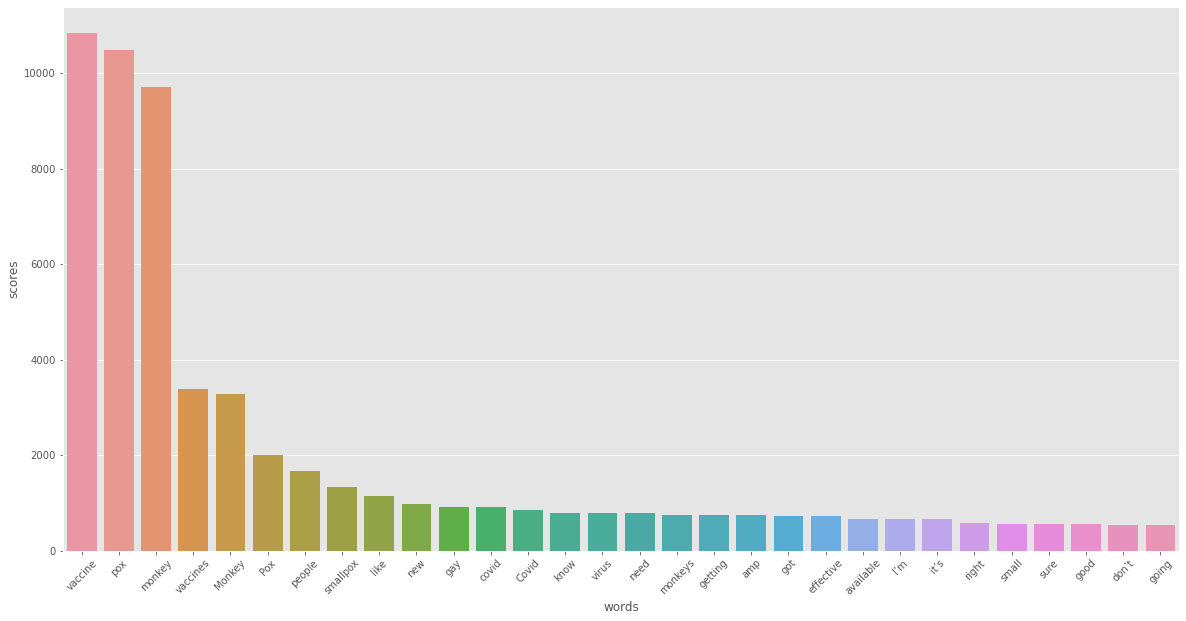

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

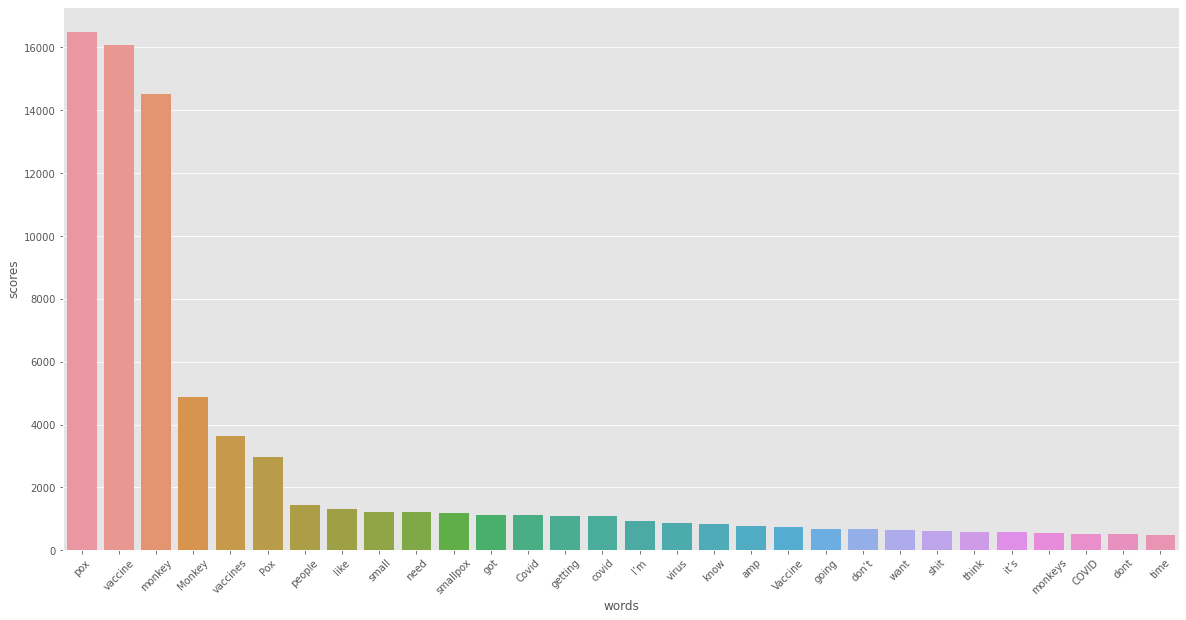

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

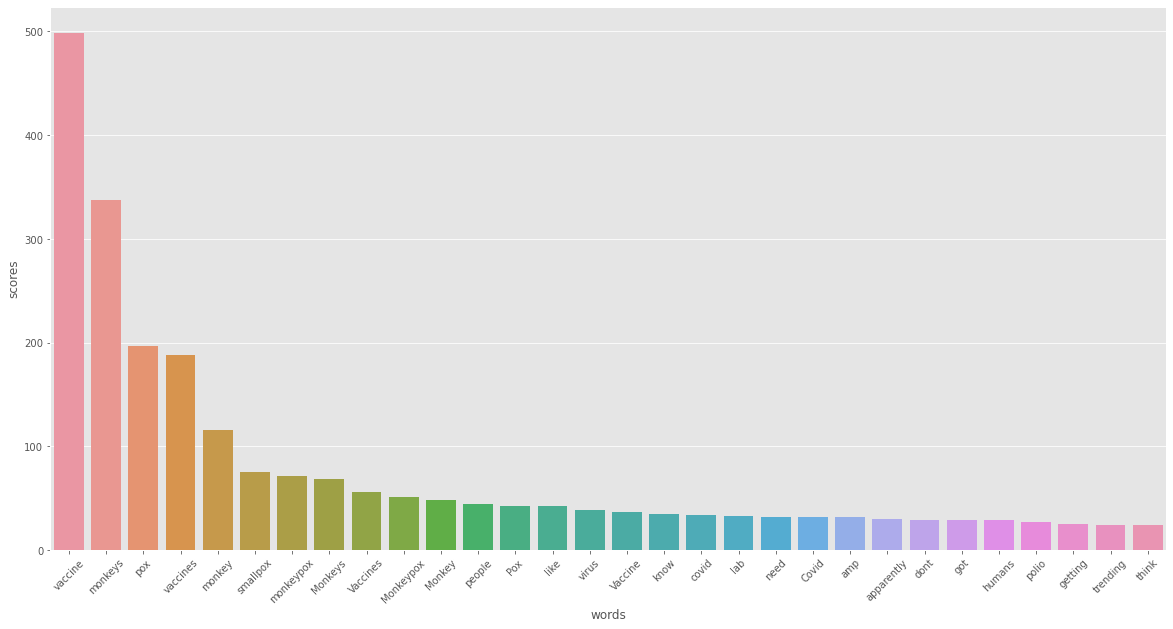

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

### wordcloud

In [55]:
!pip install wordcloud

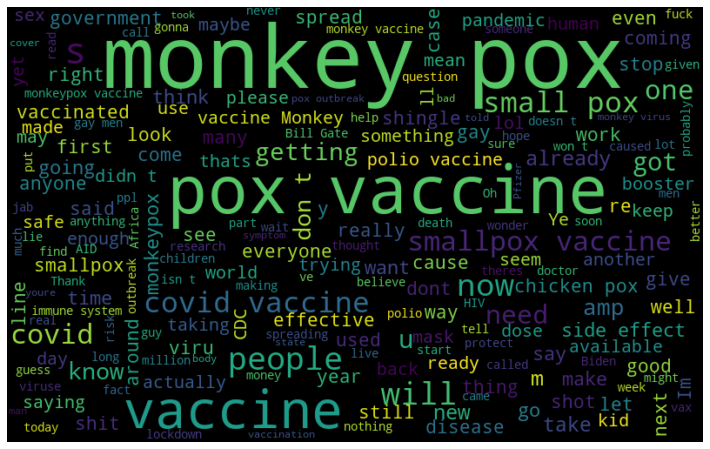

In [56]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### top 5 hashtags 
- using nltk

In [57]:
print(df['Hashtag'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
33764    NaN
33765    NaN
33766    NaN
33767    NaN
33768    NaN
Name: Hashtag, Length: 33769, dtype: object


In [58]:
Hashtag= df['Hashtag']

In [82]:
import nltk
freq = nltk.FreqDist(Hashtag)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,NaN,32059
1,"['myfoxla', 'ktlatalktous', 'mokeypoxvaccine',...",1
2,['Reuters'],1
3,"['tulsa', 'monkeypox', 'okeq']",1
4,['Evusheld'],4


In [87]:
d1= d.sort_values(by='Count', ascending=False)


In [93]:
d2 = d1.drop(d.index[5])
d2

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
13,['Monkeypox'],21
800,['StopTheTreaty'],19
...,...,...
443,"['vax', 'monkeypox']",1
444,"['RejoinEU', 'NEVERAGAIN', 'covid', 'nazi', 'L...",1
445,['Work4US'],1
447,"['SNL', 'Ffs']",1


In [94]:
d3= d2.drop(d2.index[4])
d3.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
13,['Monkeypox'],21
235,"['ETH', 'BTC', 'God', 'USA', 'news', 'BB24', '...",11
...,...,...
1086,['MRNA'],1
1141,"['inflation', 'fear', 'monkeypox', 'fuckit']",1
1075,"['idontstandwithtrudeau', 'weseewhatyourdoing'...",1
1076,"['AMC', 'AMCAddict', 'AMCSqueeze', 'AMCAPES', ...",1


In [95]:
d4= d3.drop(d3.index[4])
d4.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
13,['Monkeypox'],21
43,['MonkeyPox'],9
...,...,...
1086,['MRNA'],1
1141,"['inflation', 'fear', 'monkeypox', 'fuckit']",1
1075,"['idontstandwithtrudeau', 'weseewhatyourdoing'...",1
1076,"['AMC', 'AMCAddict', 'AMCSqueeze', 'AMCAPES', ...",1


In [97]:
d5= d4.drop(d4.index[3])
d5.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
43,['MonkeyPox'],9
47,['TikTok'],9
...,...,...
1086,['MRNA'],1
1141,"['inflation', 'fear', 'monkeypox', 'fuckit']",1
1075,"['idontstandwithtrudeau', 'weseewhatyourdoing'...",1
1076,"['AMC', 'AMCAddict', 'AMCSqueeze', 'AMCAPES', ...",1


In [99]:
d6= d5.drop(d5.index[3])
d6.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
47,['TikTok'],9
76,['monkeypoxvaccine'],9
...,...,...
1086,['MRNA'],1
1141,"['inflation', 'fear', 'monkeypox', 'fuckit']",1
1075,"['idontstandwithtrudeau', 'weseewhatyourdoing'...",1
1076,"['AMC', 'AMCAddict', 'AMCSqueeze', 'AMCAPES', ...",1


In [101]:
d7= d6.drop(d6.index[4])
d7.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
47,['TikTok'],9
122,['auspol'],9
944,['BillGatesBioTerrorist'],8
1052,"['monkeypox', 'MajorsLast', 'StopTheTreaty']",7


In [109]:
d8= d7.drop(d7.index[3])
d8.sort_values(by='Count', ascending=False)

,Hashtag,Count
0,NaN,32059
8,['monkeypox'],179
17,['MonkeypoxVirus'],28
122,['auspol'],9
944,['BillGatesBioTerrorist'],8
1052,"['monkeypox', 'MajorsLast', 'StopTheTreaty']",7


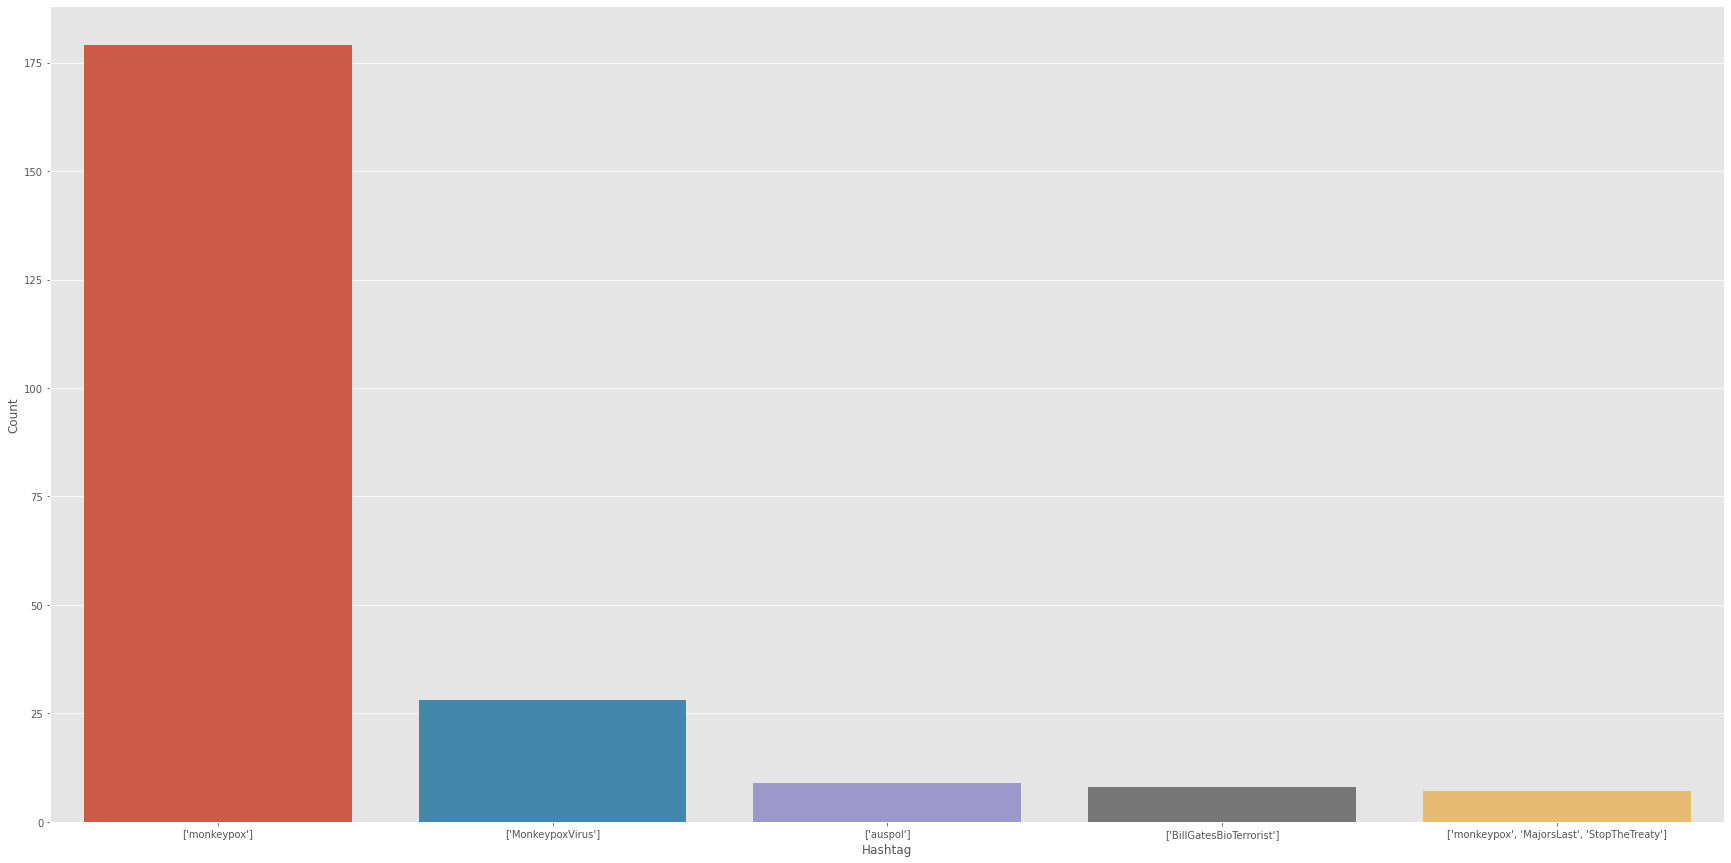

In [110]:
# select top 10 hashtags
d8 = d8.nlargest(columns='Count', n=8)
plt.figure(figsize=(30,15))
sns.barplot(data=d8, x='Hashtag', y='Count')
plt.show()

In [66]:
Verified= df['Verified']

In [67]:
Verified

0        False
1        False
2        False
3        False
4        False
         ...  
33764    False
33765    False
33766    False
33767    False
33768    False
Name: Verified, Length: 33769, dtype: bool

Text(0.5, 1.0, ' quantity of verified accounts VS unverified accounts that gives their opinion of monkeypox vaccine ')

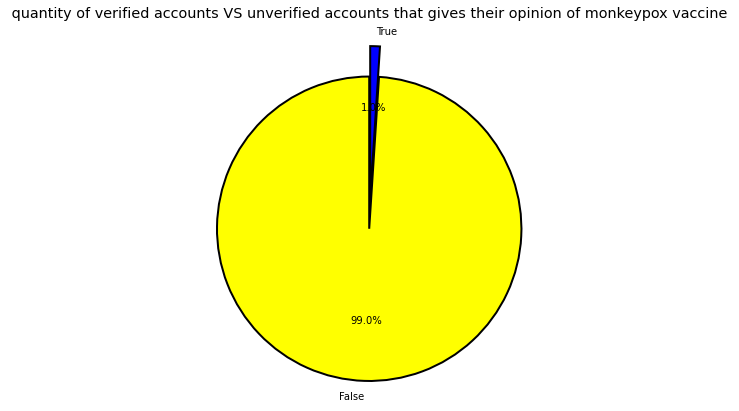

In [69]:
fig = plt.figure(figsize=(7,7))
colors = ("yellow", "blue",)
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['Verified'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title(' quantity of verified accounts VS unverified accounts that gives their opinion of monkeypox vaccine ')